<h1>Data Science Capstone Project</h1>

## Table of Contents

<ol>
    <li>Introduction</li>
    <li>Data Desciption/Analysis</li>
    
</ol>
    

## Introduction

### Background
From the 2019 Seattle Car Accident Statistics & Reports: 
The Washington State Department of Transportation (WSDOT) reports that in 2019, there were 10,315 total collisions in Seattle; of those, 3,658 resulted in possible injuries. They go on to report that deaths are up but serious injuries are down (part of this relating to the <a href="https://www.seattletimes.com/seattle-news/ntsb-ruling-expected-today-on-cause-of-ride-the-ducks-crash/">Ride the Ducks vehicle crash</a> in 2015 which resulted from improper maintenance.


##### Problem: 
Seattle's collision rate from 2015 to present has been on the rise and with more collisions comes the likelihood of more accidents.

##### Project Intent: 
The intent of this project is to attemp to identify situations which are more likely to result in injury.
  

## Data Description/Analysis

<h4> Raw Data:</h4>
<ul>
    <li>The given csv file contained 38 fields, of these, thirteen were integers, four were floating point/decimal numeric values, and the rest were mixed data or text.</li>
    <li>Upon analysis of the the raw data it became apparent that some cleanup needed to be done. NaN values (missing data/null) were replaced with zeros, and fields which may have had zeros and "N"s within the same field or 1s and "Y"s in the same field needed to be stadardized. Values within these fields were all replaced with either 0s or 1s to be used as ints or bools.</li>
    <li>Missing values (NaNs) in text fields were replaced with the text "Unknown."</li>
    <li>Two fields (X, and Y) appear to be latitude and longitude. These may be useful in determining if certain areas of the city are more prone to accidents.</li>
</ul>

<h4> Analysis:</h4>
    <p>The data was grouped into two sets, numeric and text, to determine where there was significant variation between the values within the fields.</p>
    <p><b><i>Numeric data fields</i></b><br>('SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','UNDERINFL','SPEEDING','HITPARKEDCAR'):</p>
    <ul>
    <li><b>Severity</b> - Only two values exist within the example dataset but the metadata document indicates that there are five possible values for severity (0-Unknown,1-prop damage,2-injury,2b-serious injury,3-fatality). For further analysis of data including the remaining codes, the data would have to be converted to strictly integer codes.</li>
    <li><b>Person Count/Vehicle Count</b> - appears to have no significance on the severity of the accident. The vast majority of collisions include only a single person and therefore are highest for a single person for both property damage and injury.</li>
    <li><b>Ped Count and Ped Cycle Count</b> - Severity appears to be higher (above average and more likely to result in injury) as pedestrians and cyclists have less protection when struck by a vehicle.</li>
    <li><b>Under the Influence and Speeding</b> - May result in a severity higher than two but unable to verify without data which contains severity codes greater than two.</li>
    <li><b>Hit Parked Car</b> - Overwhelmingly property damage; these incidents are likely to occur at low speeds (while parking) and are unlikely to result in injury.</li>
    </ul>

<p><b><i>Text data fields</i></b><br>('ROADCOND','COLLISIONTYPE','WEATHER','LIGHTCOND'):</p>
<ul>
    <li><b>Note:</b> The text datafields seem to offer the best correlation between severity and their individual values; particularly for weather conditions and collision type. </li>
    <li><b>Road Condition</b> - low correlation between the road conditions and the severity of the accident. Based on the data, one may be able to say that there is a slightly higher likelihood that wet or oily road conditions have slightly higher effect on the severity of an accident but overall there are more significant correlations based on Collision Type and Weather.</li>
    <li><b>Collision Type</b> - Collisions with cycles and pedestrians have a much higher probablity of being an injury (sev type 2). Almost nine out of ten collisions with pedestrians or cyclists result in injury.</li>
    <li><b>Weather</b> - Oddly enough, the weather condition 'Partly Cloudy' in most incidents where severity indicates injury. While there is a correlation, this does not imply causation and is most likely due to the high number of partially cloudy days in Seattle.</li>
    <li><b>Light Condition</b> - Does not seem to be a significant factor in determining collision severity. Even when replacing 'Dusk' and 'Dawn' with 'twilight' there's no significant change in average severity of collisions.</li>
    
    </ul>

In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics

#from preprocessing import LabelBinarizer
#from preprocessing import OneHotEncoder

%matplotlib inline

#print('Hello Capstone Project Course!')

<h4>Load dataframe from csv file</h4>

In [5]:
df = pd.read_csv("C:\\Users\\Natha.000\\Documents\\JupyterNotebooks\\Data-Collisions.csv")
print(df.dtypes)
df.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h3>Identify fields which have inforation useful to categorization of severity</h3>
<table>
    <tr>
        <td>Fieldname</td>
        <td>Reason for importance</td>
    </tr>
    <tr>
        <td>SeverityCode</td>
        <td>Useful for training the ML Model</td>
    </tr>
    <tr>
        <td>AddrType</td>
        <td>Intersections may be more likely to result in a perpendicular collision</td>
    </tr>
    <tr>
        <td>SEVERITYCODE</td>
        <td>This is a duplicate, one should be removed.</td>
    </tr>
    <tr>
        <td>SEVERITYDESC</td>
        <td>Injury or property damage; assuming that injury is more severe.</td>
    </tr>
    <tr>
        <td>COLLISIONTYPE</td>
        <td>Checking to see what types are more servere.</td>
    </tr>
    <tr>
        <td>PERSONCOUNT</td>
        <td>Assuming that the more people are involved, the greater the severity, test theory. Includes passengers?</td>
    </tr>
    <tr>
        <td>PEDCOUNT</td>
        <td>Hitting a pedestrian is likely more severe since they're squishy</td>
    </tr>
    <tr>
        <td>PEDCYLCOUNT</td>
        <td>Assuming that this is bicycles, also lack the protection of a vehicle.</td>
    </tr>
    <tr>
        <td>VEHCOUNT</td>
        <td>Greater count = greater severity?</td>
    </tr>
    <tr>
        <td>UNDERINFL</td>
        <td>Does influence have an impact on severity? if so, how much?</td>
    </tr>
    <tr>
        <td>WEATHER</td>
        <td>What's the effect of the weather? does it matter if it's just overcast and not wet?</td>
    </tr>
    <tr>
        <td>ROADCOND</td>
        <td>Wet or dry? </td>
    </tr>
    <tr>
        <td>LIGHTCOND</td>
        <td>Visibility is likely a factor.</td>
    </tr>
    <tr>
        <td>SPEEDING</td>
        <td>Likely to cause major severity unless cars are going in the same direction.</td>
    </tr>
    <tr>
        <td>HITPARKEDCAR</td>
        <td>Check to see if this ever results in a severity greater than 1.</td>
    </tr>

</table
    

<h4>Create a dataframe of selected fields</h4>

In [6]:
df_sel = df[['OBJECTID','SEVERITYCODE','SEVERITYDESC','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','HITPARKEDCAR']]
df_sel.head()

# view unique values for each field
columns = list(df_sel)
for i in columns:
    print(i)
    print(df_sel[i].unique())

OBJECTID
[     1      2      3 ... 219545 219546 219547]
SEVERITYCODE
[2 1]
SEVERITYDESC
['Injury Collision' 'Property Damage Only Collision']
ADDRTYPE
['Intersection' 'Block' 'Alley' nan]
COLLISIONTYPE
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
PERSONCOUNT
[ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]
PEDCOUNT
[0 1 2 3 4 5 6]
PEDCYLCOUNT
[0 1 2]
VEHCOUNT
[ 2  3  1  0  4  7  5  6  8 11  9 10 12]
UNDERINFL
['N' '0' nan '1' 'Y']
WEATHER
['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']
ROADCOND
['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
LIGHTCOND
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street L

### Notes on data

<b>Looks like a few of the columns could use some cleanup</b>
<list>
    <ol><b><i>UNDERINFL</i></b> - looks like this has both text and boolean values - make all these bool (0 or 1).</ol>
    <ol><b><i>SEVERITYCODE</i></b> - I'm surprised that this is only limited to 1 (peroperty) or 2 (injury).</ol>
    <ol><b><i>SPEEDING</i></b> - need to fix this data, nans to 0, 'Y's to 1.</ol>
    <ol><b><i>HITPARKEDCAR</i></b> - change to bool (0 or 1).</ol>
    <ol><b><i>PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, AND VEHCOUNT</i></b> - probably not necessary if we're just classifying severity as injury or property damage. Would only be useful if we're creating an injury-severity rating.</ol>
    <ol><b><i>COLLISIONTYPE, WEATHER, ROADCOND, AND LIGHTCOND</i></b> - need to check correlations between severity and these types. High correlation items may be selected and used for ML. One hot encoding?</ol>
</list>
    

### Clean/Standardize data

In [29]:
# replace nans
df_sel.replace(np.nan,0)

# standardize bool columns
df_sel = df_sel.replace(['Y','1'],1)
df_sel = df_sel.replace(['N','0'],0)

# fix under influence column to int bool values (from float)
df_sel['UNDERINFL'] = df_sel['UNDERINFL'].replace(np.nan,0)
df_sel['UNDERINFL'] = df_sel['UNDERINFL'].astype(int)
df_sel['SPEEDING'] = df_sel['SPEEDING'].replace(np.nan,0)
df_sel['SPEEDING'] = df_sel['SPEEDING'].astype(int)

# fix test fields; nans to 'unknown's
txtFields = ['ROADCOND','COLLISIONTYPE','WEATHER','LIGHTCOND']
numFields = ['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','UNDERINFL','SPEEDING','HITPARKEDCAR']
for i in txtFields:
    df_sel[i] = df_sel[i].replace(np.nan,'Unknown')
    
# standardize dawn and dusk to twilight
df_sel['LIGHTCOND'] = df_sel['LIGHTCOND'].replace('Dawn','twilight')
df_sel['LIGHTCOND'] = df_sel['LIGHTCOND'].replace('Dusk','twilight')
    
# View standardized data
for i in columns:
    print(i)
    print(df_sel[i].unique())

OBJECTID
[     1      2      3 ... 219545 219546 219547]
SEVERITYCODE
[2 1]
SEVERITYDESC
['Injury Collision' 'Property Damage Only Collision']
ADDRTYPE
['Intersection' 'Block' 'Alley' nan]
COLLISIONTYPE
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 'Unknown' 'Left Turn' 'Pedestrian' 'Right Turn']
PERSONCOUNT
[ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]
PEDCOUNT
[0 1 2 3 4 5 6]
PEDCYLCOUNT
[0 1 2]
VEHCOUNT
[ 2  3  1  0  4  7  5  6  8 11  9 10 12]
UNDERINFL
[0 1]
WEATHER
['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
ROADCOND
['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
LIGHTCOND
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Unknown'
 'twilight' 'Dark - Street Lights Off' 'Other' 'Dark 

### Exploratory Analysis

The numeric values seem to have little impact on the severity as the values do not vary widely. Possibly speeding and under the influence if combined with other conditions.


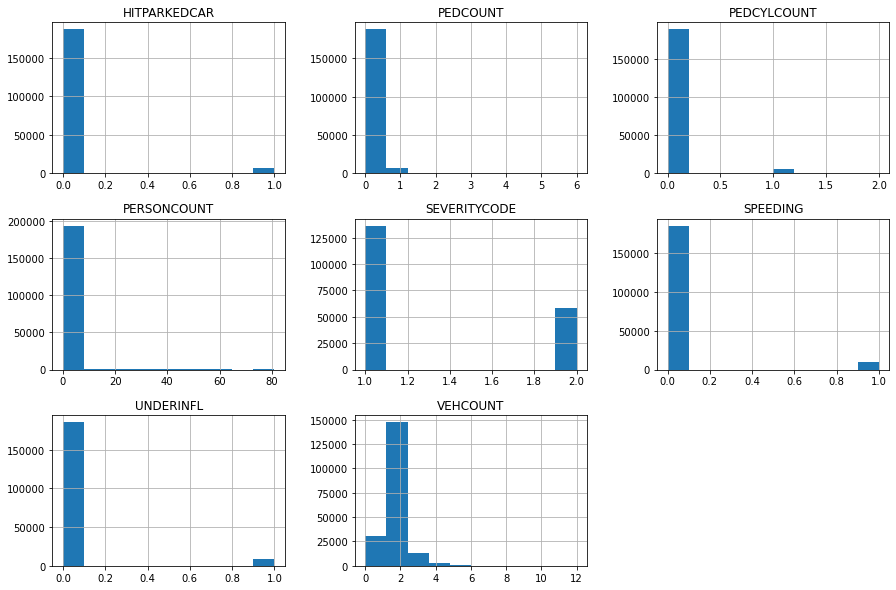

In [8]:
# np.histogram 
#df_sel['VEHCOUNT'].plot(kind='hist', figsize=(4, 3))

hdf = df_sel[numFields]
viz = hdf[numFields]
viz.hist(figsize=(15, 10))
#viz.show()

#print(df_sel.describe())

print("The numeric values seem to have little impact on the severity as the values do not vary widely. Possibly speeding and under the influence if combined with other conditions.")

## Questions

Are there incidents of collisions with pedestrians or cyclists where there is no injury?<br>
What is the rate of collisions under the influence where there is no injury?<br>
What happened in the instances where there were more than 10 people in an accident? (outliers?)<br>
Number of incidents where speeding is involved is low, but what's the rate of injury where it does happen?<br>
Number of incidents where a pedestrian is involved is low, but what's the rate of injury where it does happen?<br>
What about collisions where no vehicle is involved?<br>

normalized severity code for weather
                          SEVERITYCODE
WEATHER                               
Blowing Sand/Dirt             1.267857
Clear                         1.322491
Fog/Smog/Smoke                1.328647
Other                         1.139423
Overcast                      1.315544
Partly Cloudy                 1.600000
Raining                       1.337185
Severe Crosswind              1.280000
Sleet/Hail/Freezing Rain      1.247788
Snowing                       1.188534
Unknown                       1.094190
 
Normalized severity by weather type
WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                      

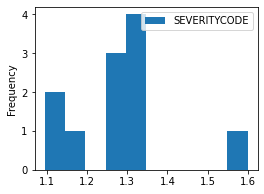

In [9]:
# Create ID for weather values
w = df_sel['WEATHER'].unique()
#wf.groupby(by='WEATHER').agg('count')
wf = pd.DataFrame()
wf['WEATHER']=w
wf["wId"] = wf.index + 1
#print(wf)

# add wId field ot df_sel
df_sel['wId'] = 0

# update column wId in df_sel based on 'WEATHER'
for index, row in wf.iterrows():
    wid = row['wId']
    wea = row['WEATHER']
    df_sel['wId'] = np.where((df_sel['WEATHER'] == wea), wid, df_sel['wId'])      #This is the column that is affected
#print(df_sel[['WEATHER','wId']][0:20])

wwf = df_sel[['WEATHER','SEVERITYCODE']]
w = wwf.groupby(by='WEATHER').agg('mean')
w.plot(kind='hist', figsize=(4, 3))
print('normalized severity code for weather')
print(w)


print(' ')
print('Normalized severity by weather type')
print(df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True))
print('Higher severity collisions have a tendency to happen more when the weather is partly cloudy.')

print('Higher avg severity for partially cloudy days. Dark (reduced visibility), but not enough for headlights?')
print(' ')
print('Is it possible that the weather condition of partially cloudy is not a contributing factor but merely the most likely state of weather for Seattle?')


               SEVERITYCODE
COLLISIONTYPE              
Angles             1.392917
Cycles             1.876085
Head On            1.430830
Left Turn          1.394877
Other              1.257858
Parked Car         1.055473
Pedestrian         1.898305
Rear Ended         1.430361
Right Turn         1.206022
Sideswipe          1.134666
Unknown            1.212276
Collisions with cycles and pedestrians have a much higher probablity of being an injury (sev type 2)
COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2           

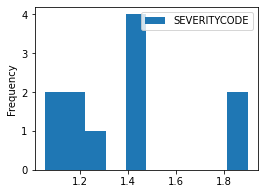

In [10]:
# Create ID for collision type values
c = df_sel['COLLISIONTYPE'].unique()
cf = pd.DataFrame()
cf['COLLISIONTYPE']=c
cf["cId"] = cf.index + 1
#print(cf)

# add cId field ot df_sel
df_sel['cId'] = 0

# update column cId in df_sel based on 'collision type'
for index, row in cf.iterrows():
    cid = row['cId']
    col = row['COLLISIONTYPE']
    df_sel['cId'] = np.where((df_sel['COLLISIONTYPE'] == col), cid, df_sel['cId'])      #This is the column that is affected
#print(df_sel[['COLLISIONTYPE','cId']][0:20])

ccf = df_sel[['COLLISIONTYPE','SEVERITYCODE']]
c = ccf.groupby(by='COLLISIONTYPE').agg('mean')
c.plot(kind='hist', figsize=(4, 3))
print(c)
print('Collisions with cycles and pedestrians have a much higher probablity of being an injury (sev type 2)')


print(df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True))

print('Higher avg severity for pedestrian and cycle collisions; more likely to be injuries')

                SEVERITYCODE
ROADCOND                    
Dry                 1.321773
Ice                 1.225806
Oil                 1.375000
Other               1.325758
Sand/Mud/Dirt       1.306667
Snow/Slush          1.166335
Standing Water      1.260870
Unknown             1.090045
Wet                 1.331866
No single road condition exceeds 1.5; unable to see clear factor for severity


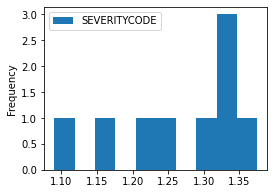

In [11]:
# Create ID for road conditions values
r = df_sel['ROADCOND'].unique()
rf = pd.DataFrame()
rf['ROADCOND']=r
rf["rId"] = rf.index + 1
#print(rf)

# add rId field ot df_sel
df_sel['rId'] = 0

# update column wId in df_sel based on 'WEATHER'
for index, row in rf.iterrows():
    rid = row['rId']
    roa = row['ROADCOND']
    df_sel['rId'] = np.where((df_sel['ROADCOND'] == roa), rid, df_sel['rId'])      #This is the column that is affected
#print(df_sel[['ROADCOND','rId']][0:20])

rrf = df_sel[['ROADCOND','SEVERITYCODE']]

h = rrf.groupby(by='ROADCOND').agg('mean')
h.plot(kind='hist', figsize=(4, 3))
print(h)

print('No single road condition exceeds 1.5; unable to see clear factor for severity')

In [12]:
#more testing for road conditions

#print(df_sel['ROADCOND'].value_counts(normalize=True))

#df_selR = df_sel[['ROADCOND','SEVERITYCODE']]
#dfr = df_selR.melt(var_name='ROADCOND', value_name='SEVERITYCODE')
#dfrx = pd.crosstab(index=dfr['SEVERITYCODE'], columns=dfr['ROADCOND'])
#print(dfrx)

                          SEVERITYCODE
LIGHTCOND                             
Dark - No Street Lights       1.217306
Dark - Street Lights Off      1.263553
Dark - Street Lights On       1.298411
Dark - Unknown Lighting       1.363636
Daylight                      1.331884
Other                         1.221277
Unknown                       1.090919
twilight                      1.329367
LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Daylight                  1               0.668116
                          2               0.331884
Other                     1               0.778723
          

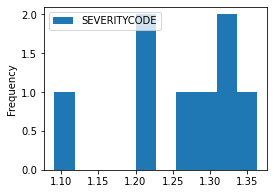

In [32]:
# Create ID for light conditions values
l = df_sel['LIGHTCOND'].unique()
lf = pd.DataFrame()
lf['LIGHTCOND']=l
lf["lId"] = lf.index + 1
#print(lf)

# add rId field ot df_sel
df_sel['lId'] = 0

# update column wId in df_sel based on 'WEATHER'
for index, row in lf.iterrows():
    lid = row['lId']
    lig = row['LIGHTCOND']
    df_sel['lId'] = np.where((df_sel['LIGHTCOND'] == lig), lid, df_sel['lId'])      #This is the column that is affected
#print(df_sel[['ROADCOND','rId']][0:20])

llf = df_sel[['LIGHTCOND','SEVERITYCODE']]

l = llf.groupby(by='LIGHTCOND').agg('mean')
l.plot(kind='hist', figsize=(4, 3))
print(l)


print(df_sel.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True))

print('No single road condition exceeds 1.5; unable to see clear factor for severity')

#### Vehicle Count

In [14]:
print(df.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True))
print('High severity vehicle counts appear to be primarily single vehicles; but that\'s probably because the vast number of incidents only involve one vehicle.')

VEHCOUNT  SEVERITYCODE
0         1               0.758702
          2               0.241298
1         2               0.547810
          1               0.452190
2         1               0.756526
          2               0.243474
3         1               0.579554
          2               0.420446
4         1               0.555647
          2               0.444353
5         1               0.506616
          2               0.493384
6         1               0.589041
          2               0.410959
7         1               0.521739
          2               0.478261
8         1               0.666667
          2               0.333333
9         2               0.666667
          1               0.333333
10        2               1.000000
11        1               0.500000
          2               0.500000
12        1               1.000000
Name: SEVERITYCODE, dtype: float64
High severity vehicle counts appear to be primarily single vehicles; but that's probably because the v

In [15]:
print(df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True))
print('Intersections appear to have a greater impact on injury that alley or block.')

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64
Intersections appear to have a greater impact on injury that alley or block.


### Attempting one hot encoding for two of the text related variables

#### Weather

In [16]:

Feature = df_sel[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','UNDERINFL','SPEEDING','HITPARKEDCAR']]
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,SPEEDING,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
X = Feature
y = df_sel['SEVERITYCODE']

# Normalize data

X= preprocessing.StandardScaler().fit(X).transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (155738, 15) (155738,)
Test set: (38935, 15) (38935,)


### Testing with KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# k = 8 appears to have the best test set accuracy (75.0%)
k = 8
# train
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=8)


In [20]:
yhat = neigh.predict(X_test)
yhat[0:5]

# Accuracty of selected K (K = 8)
print("Train set acc: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set acc: ", metrics.accuracy_score(y_test, yhat))

Train set acc:  0.7472999524843006
Test set acc:  0.7503017850263259


[0.7143701  0.73317067 0.71668165 0.74267369 0.73049955 0.7493258
 0.74311031 0.75030179 0.74768203]


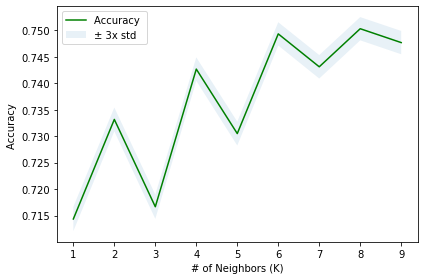

In [21]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
print(mean_acc)

# Accuracy for K neighbors chart
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc,alpha=0.10)
plt.legend(('Accuracy ', '± 3x std'))
plt.ylabel('Accuracy ')
plt.xlabel('# of Neighbors (K)')
plt.tight_layout()
plt.show()

#### Collision Type

In [22]:
Feature = df_sel[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','UNDERINFL','SPEEDING','HITPARKEDCAR']]
Feature = pd.concat([Feature,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
#Feature.drop(['Unknown'], axis = 1,inplace=True)
#Feature.drop(['Other'], axis = 1,inplace=True)
Feature.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,SPEEDING,HITPARKEDCAR,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [23]:
X = Feature
y = df_sel['SEVERITYCODE']

# Normalize data

X= preprocessing.StandardScaler().fit(X).transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (155738, 16) (155738,)
Test set: (38935, 16) (38935,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

# k = 4 appears to have the best test set accuracy (75.1%)
k = 4
# train
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)

yhat = neigh.predict(X_test)
#hat[0:5]

# Accuracty of selected K (K = 4)
print("Train set acc: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set acc: ", metrics.accuracy_score(y_test, yhat))

KNeighborsClassifier(n_neighbors=4)
Train set acc:  0.7489758440457692
Test set acc:  0.7511493514832412


[0.66148709 0.71005522 0.7080262  0.75114935 0.7296263  0.74452292
 0.71544882 0.7424939  0.74269937]


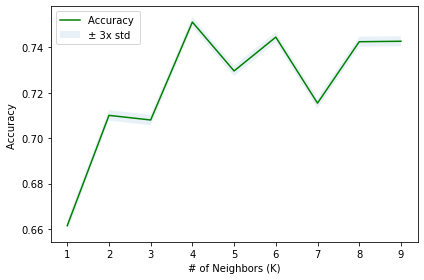

In [26]:
# Testing data to find best K value for KNN
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
print(mean_acc)

# Accuracy for K neighbors chart
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc,alpha=0.10)
plt.legend(('Accuracy ', '± 3x std'))
plt.ylabel('Accuracy ')
plt.xlabel('# of Neighbors (K)')
plt.tight_layout()
plt.show()